In [1]:
from expansion_tools.blob_expansion_tools_jetset import build_Temp_EV,do_analysistemp_ev
from jetset.data_loader import Data,ObsData
from jetset.plot_sedfit import PlotSED
import  gzip
from jetset.jet_timedep import JetTimeEvol


## Notebook to reproduce Section 3.2 of the paper

### A representative SED of Mrk 421, previously fitted with jetset, and used to calibrate the flaring temporal evolution


***  binning data  ***
---> N bins= 86
---> bin_widht= 0.2


--------------------------------------------------------------------------------
Composite model description
--------------------------------------------------------------------------------
name: SSC-best-fit-lsb  
type: composite_model  
components models:
 -model name: jet_leptonic model type: jet

--------------------------------------------------------------------------------
individual component description

--------------------------------------------------------------------------------
jet model description
--------------------------------------------------------------------------------
name: jet_leptonic  

electrons distribution:
 type: lppl  
 gamma energy grid size:  201
 gmin grid : 1.586653e+01
 gmax grid : 5.181316e+05
 normalization  True
 log-values  False

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,1.586653e+01,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,5.181316e+05,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,1.308777e+02,0.000000e+00,--,False,False
jet_leptonic,gamma0_log_parab,turn-over-energy,lorentz-factor*,3.573558e+03,1.000000e+00,1.000000e+09,False,False
jet_leptonic,s,LE_spectral_slope,,1.708731e+00,-1.000000e+01,1.000000e+01,False,False
jet_leptonic,r,spectral_curvature,,1.074723e+00,-1.500000e+01,1.500000e+01,False,False
jet_leptonic,R,region_size,cm,2.821653e+15,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,2.000000e-01,0.000000e+00,--,False,False
jet_leptonic,beam_obj,beaming,lorentz-factor*,4.997505e+01,1.000000e-04,--,False,False


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


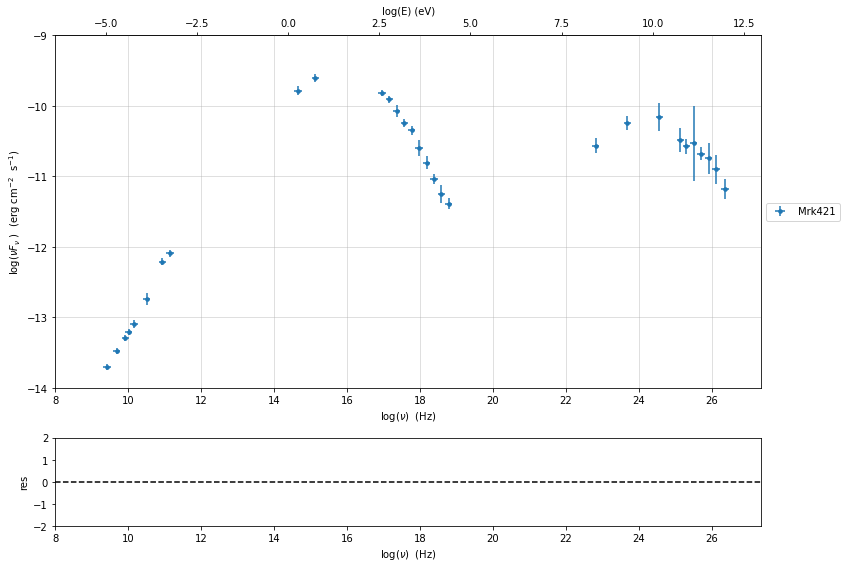

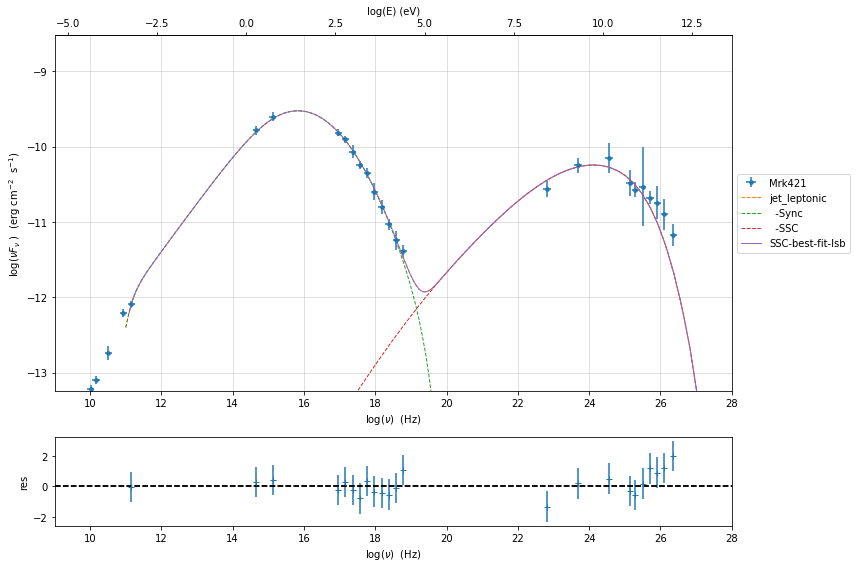

In [2]:
sed_data = ObsData(data_table=Data.from_file('sed_mrk421_mjd_56302.ecsv'))
p=PlotSED()
p.rescale(y_min=-15)
sed_data.group_data(bin_width=0.2)
sed_data.add_systematics(0.1,[10.**6,10.**29])

p.add_data_plot(sed_data)

p.rescale(y_min=-14,y_max=-9, x_min=8)

from jetset.model_manager import  FitModel
fit_model=FitModel.load_model('processing/fit_model_lsb_mjd56302.pkl')
fit_model.plot_model(sed_data=sed_data)
fit_model.show_model()


### Simulation of the Flaring Event (Section 3.2 of the paper)

==> par: z_cosm from model: jet_leptonicacc_region linked to same parameter in model jet_leptonic
--------------------------------------------------------------------------------
JetTimeEvol model description
--------------------------------------------------------------------------------
 
physical setup: 

--------------------------------------------------------------------------------


name,par type,val,units,val*,units*,log
delta t,time,5.000000e+01,s,0.00029979245799999996,R/c,False
log. sampling,time,0.000000e+00,,None,,False
R/c,time,1.667820e+05,s,1.0,R/c,False
Diff coeff,,6.666667e-06,s-1,None,,False
Acc coeff,,4.000000e-05,s-1,None,,False
IC cooling,,off,,None,,False
Sync cooling,,on,,None,,False
Diff index,,2.000000e+00,,None,,False
Acc index,,1.000000e+00,s-1,None,,False
Tesc acc,time,5.003461e+04,s,3.0,R_acc/c,False



model parameters: 

--------------------------------------------------------------------------------


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_time_ev,duration,time_grid,s,1.000000e+06,0.000000e+00,--,False,True
jet_time_ev,gmin_grid,gamma_grid,,1.000000e+00,0.000000e+00,--,False,True
jet_time_ev,gmax_grid,gamma_grid,,1.000000e+08,0.000000e+00,--,False,True
jet_time_ev,gamma_grid_size,gamma_grid,,1.500000e+03,0.000000e+00,--,False,True
jet_time_ev,TStart_Acc,time_grid,s,0.000000e+00,0.000000e+00,--,False,True
jet_time_ev,TStop_Acc,time_grid,s,1.000000e+05,0.000000e+00,--,False,True
jet_time_ev,TStart_Inj,time_grid,s,0.000000e+00,0.000000e+00,--,False,True
jet_time_ev,TStop_Inj,time_grid,s,1.000000e+05,0.000000e+00,--,False,True
jet_time_ev,T_esc_acc,escape_time,(R_acc/c)*,3.000000e+00,--,--,False,True
jet_time_ev,T_esc_rad,escape_time,(R/c)*,1.000000e+60,--,--,False,True


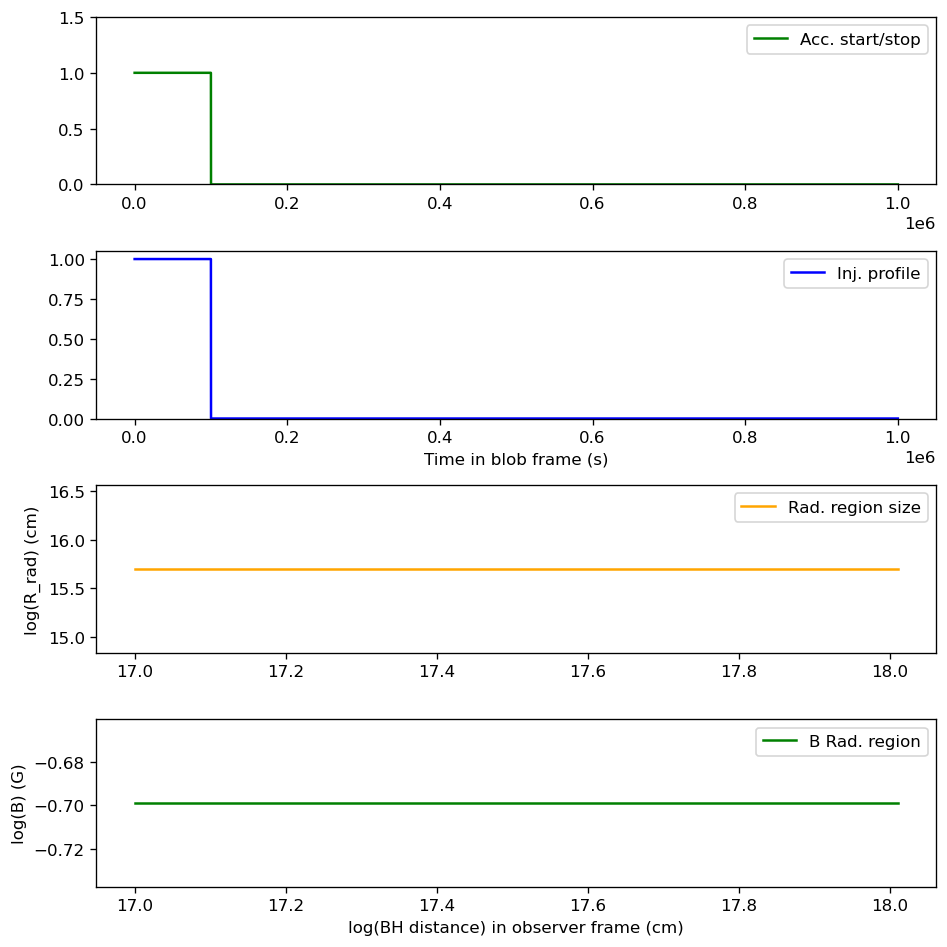

In [3]:
from jetset.jet_emitters_factory import InjEmittersFactory
q_inj=InjEmittersFactory().create_inj_emitters('pl',emitters_type='electrons',normalize=True)
q_inj.parameters.gmin.val=9
q_inj.parameters.gmax.val=10
q_inj.parameters.p.val=0.5
#OK
#OK
fit_model.jet_leptonic.parameters.beam_obj.val=30
fit_model.jet_leptonic.parameters.B.val=0.2
fit_model.jet_leptonic.parameters.R.val=5E15

flare_duration=1.0E5
duration=flare_duration*10
t_D0=1.5E5
t_A0=2.5E4
T_esc_rad=1E60
L_inj=5.0E39
E_acc_max=4E60
Delta_R_acc_ratio=0.1
B_ratio=1.0
#T_esc_acc=t_D0/(fit_model.jet_leptonic.parameters.R.val*Delta_R_acc_ratio/3E10)*5
T_esc_acc=t_A0/(fit_model.jet_leptonic.parameters.R.val*Delta_R_acc_ratio/3E10)*2
temp_ev_acc_flare = build_Temp_EV(duration=duration,
                                  Diff_Index=2,
                                  T_SIZE=2E4,
                                  flare_duration=flare_duration,
                                  delta_T=0,
                                  q_inj=q_inj,
                                  Delta_R_acc_ratio=Delta_R_acc_ratio,
                                  jet=fit_model.jet_leptonic, 
                                  show=False,
                                  B_acc_ratio=B_ratio,
                                  NUM_SET=200,
                                  L_inj=L_inj,
                                  t_D0=t_D0,
                                  t_A0=t_A0,
                                  T_esc_acc=T_esc_acc,
                                  T_esc_rad=T_esc_rad,
                                  E_acc_max=E_acc_max)
temp_ev_acc_flare.show_model()
temp_ev_acc_flare.plot_time_profile()

Set `run=False` if you have already run the simulation, and you want only to regenerate lcs or SEDs

In [4]:
run=True
delta_t_out=1E3
rest_frame='obs'

temporal evolution running


  0%|          | 0/20000 [00:00<?, ?it/s]

temporal evolution completed
caching SED for each saved distribution: start


  0%|          | 0/200 [00:00<?, ?it/s]

caching SED for each saved distribution: done
caching SED for each saved distribution: start


  0%|          | 0/200 [00:00<?, ?it/s]

caching SED for each saved distribution: done


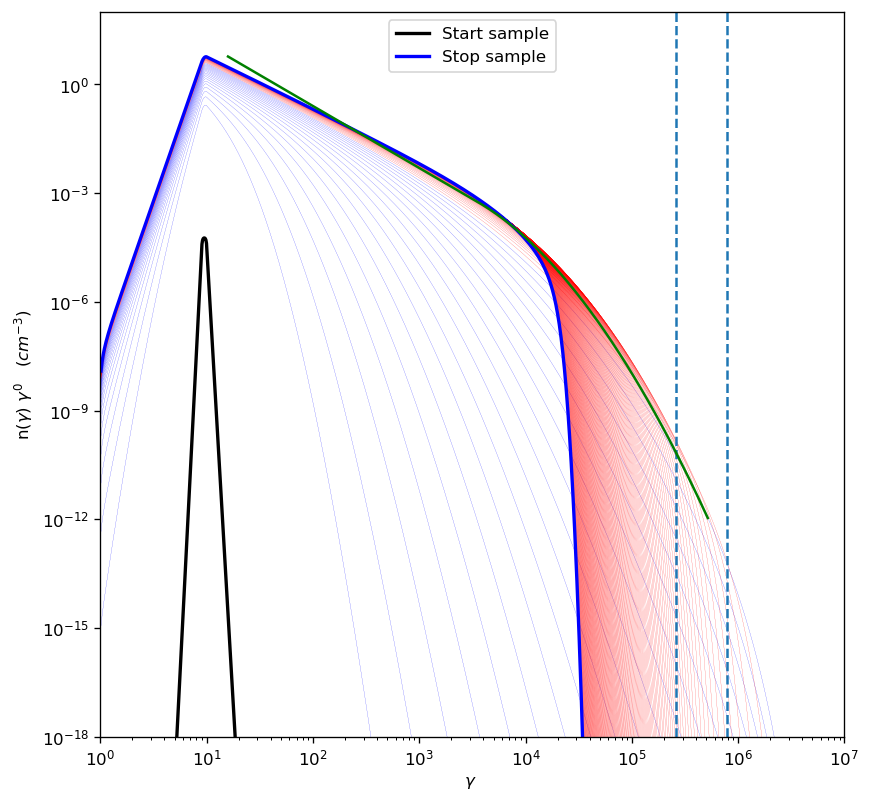

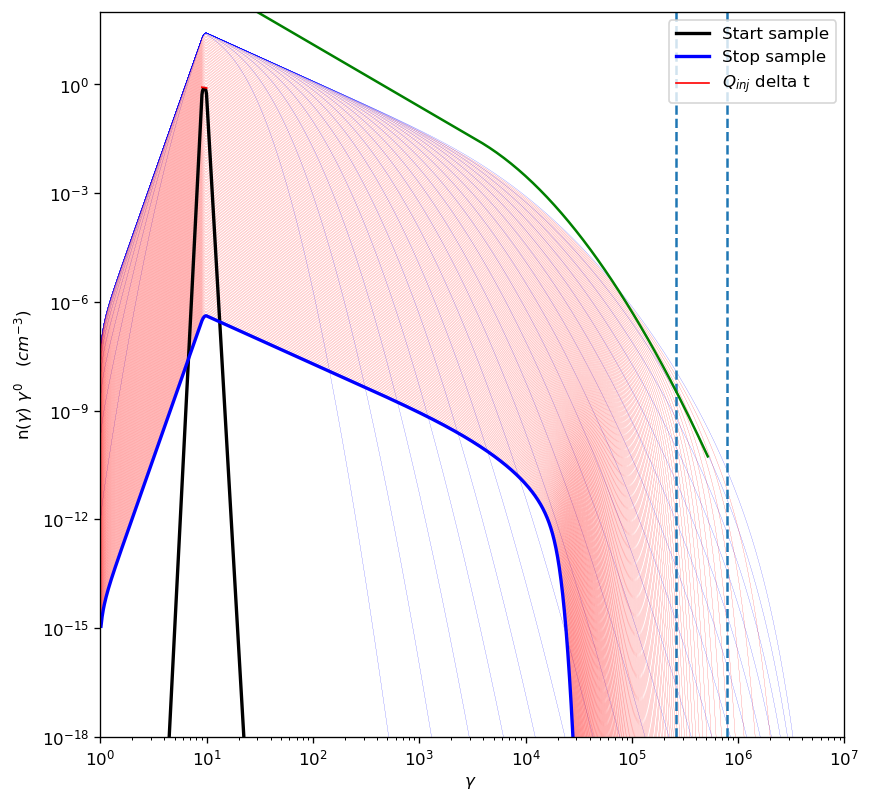

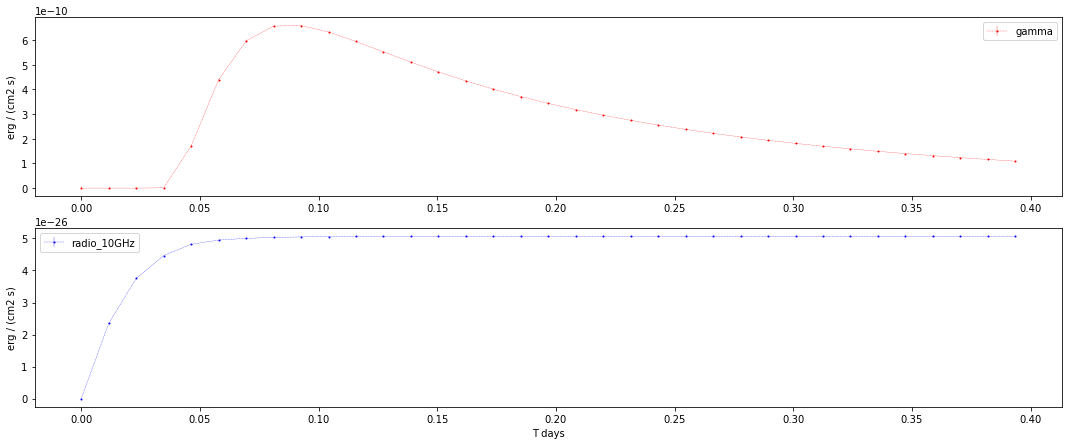

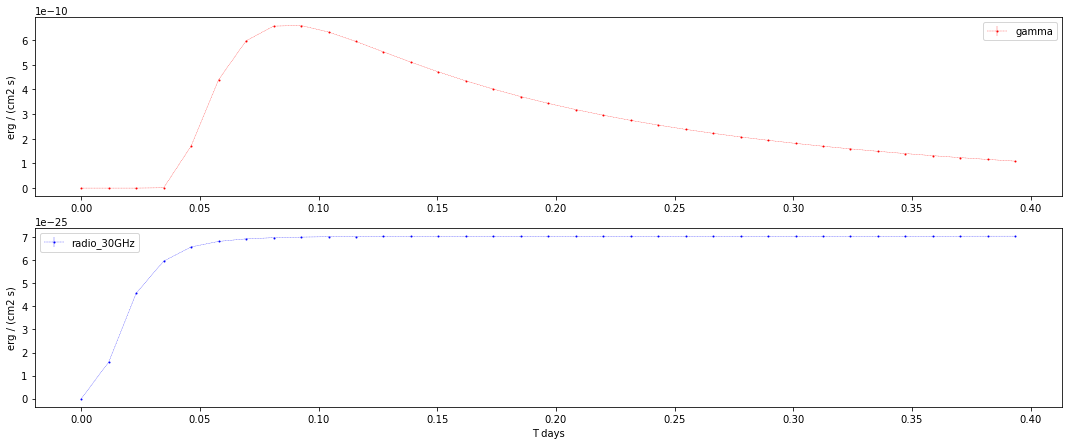

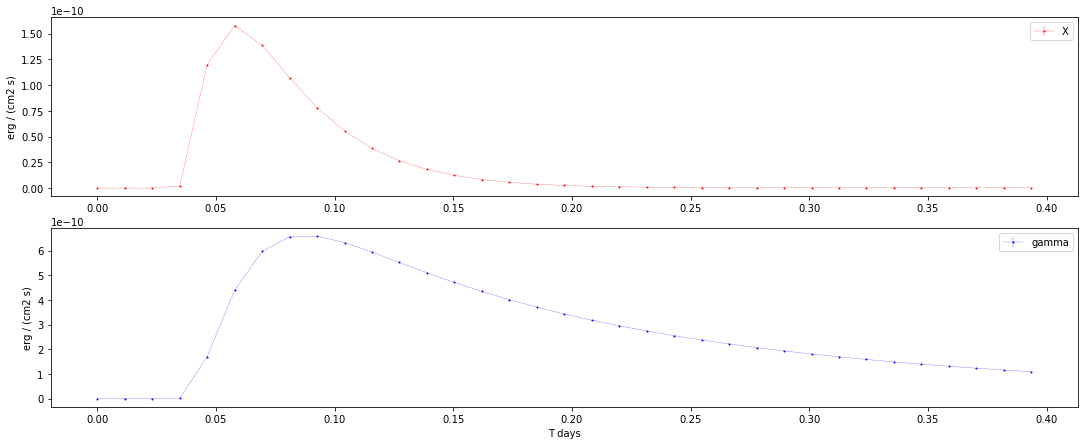

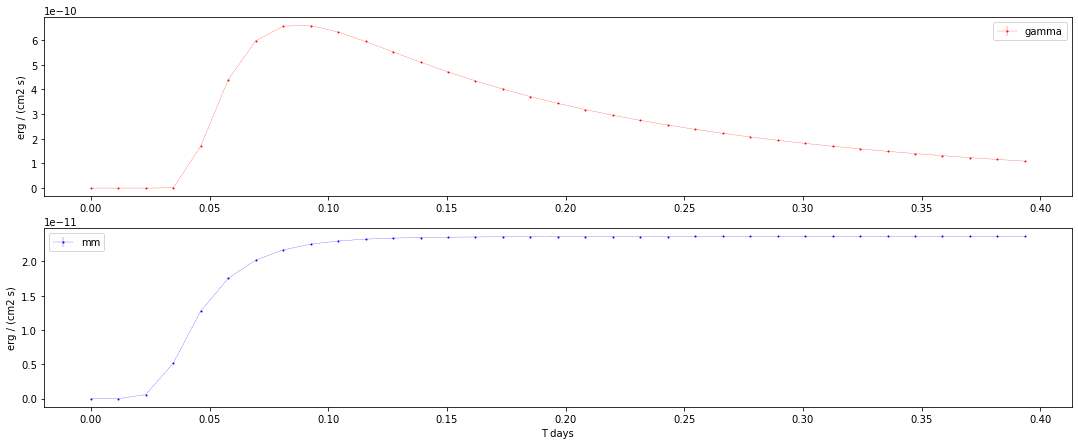

In [5]:
import pickle
if run is False:
    temp_ev_acc_flare=JetTimeEvol.load_model('temp_ev_sim_flare/temp_ev_acc_flare.pkl')

lcs_only_flare=do_analysistemp_ev(temp_ev_acc_flare,
                                 sed_data,
                                 fit_model=fit_model,
                                 run=run,
                                 only_injection=True,
                                 do_injection=True,
                                 plot_fit_model=True,
                                 plot_fit_distr=True,
                                 plot_emitters=True,
                                 plot_lcs=True,
                                 delta_t_out=delta_t_out,
                                 eval_cross_time=False,
                                 rest_frame='obs')

with open('temp_ev_sim_flare/lc_%s_flare.pkl'%(rest_frame), 'wb') as f:
    pickle.dump(lcs_only_flare, f, pickle.HIGHEST_PROTOCOL)

if run is True:
    temp_ev_acc_flare.save_model('temp_ev_sim_flare/temp_ev_acc_flare.pkl')

In [8]:
temp_ev_acc_flare=JetTimeEvol.load_model('temp_ev_sim_flare/temp_ev_acc_flare.pkl')

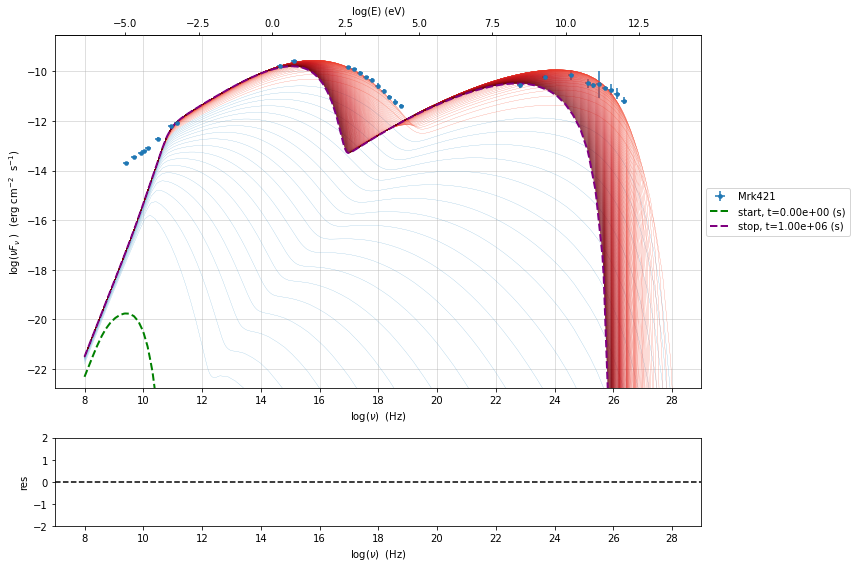

In [9]:
temp_ev_acc_flare.set_time(time_slice=-1)
temp_ev_acc_flare.plot_tempev_model(region='rad',use_cached=True,sed_data=sed_data)

In [15]:
def update_sed_plot(p):
    p.sedplot.legend(bbox_to_anchor=(1, 1), loc='best', ncol=1,fontsize=15)
    p.sedplot.xaxis.label.set_size(15)
    p.sedplot.xaxis.set_tick_params(labelsize=15)

    p.secaxy.xaxis.label.set_size(15)
    p.secaxy.xaxis.set_tick_params(labelsize=15)

    p.sedplot.yaxis.label.set_size(15)
    p.sedplot.yaxis.set_tick_params(labelsize=15)
    p.fig.tight_layout()

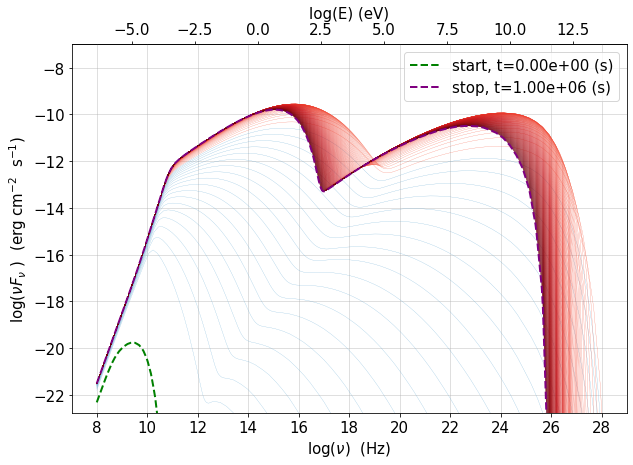

In [18]:
temp_ev_acc_flare.set_time(time_slice=-1)
p=temp_ev_acc_flare.plot_tempev_model(region='rad',use_cached=True,sed_data=None)
p.resplot.remove()
update_sed_plot(p)
p.rescale(y_max=-7)
p.fig.savefig('temp_ev_sim_flare/nuFnu_flare.pdf',bbox_inches = 'tight',
    pad_inches = 0)

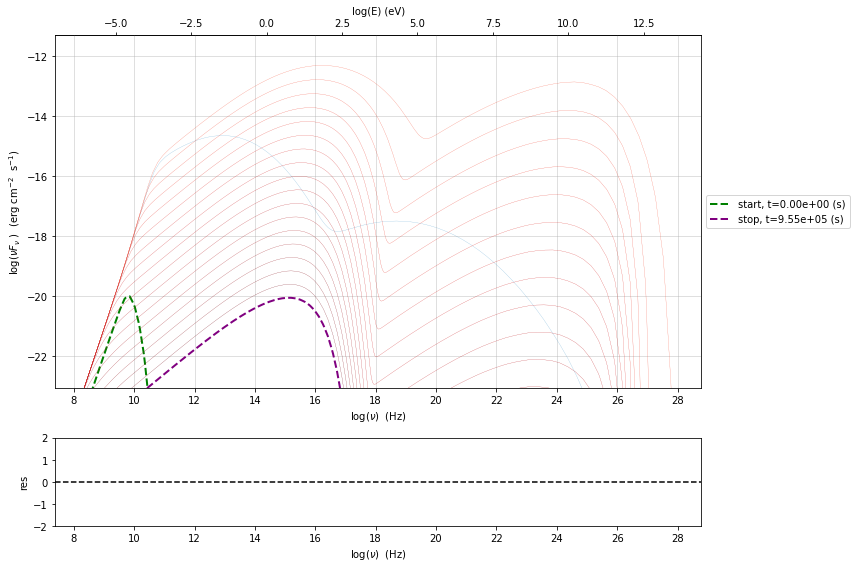

In [21]:
temp_ev_acc_flare.plot_tempev_model(region='acc',time_slice_bin=10,use_cached=True)

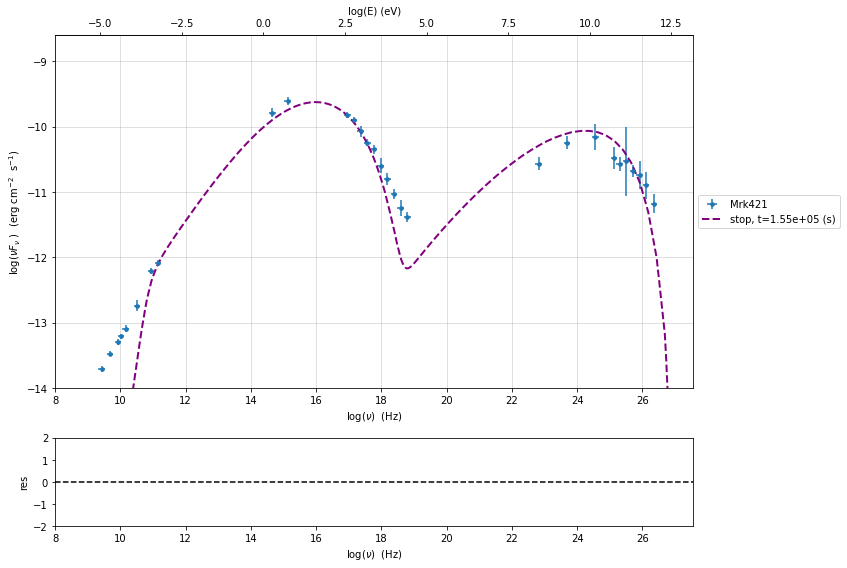

In [25]:
p=temp_ev_acc_flare.plot_tempev_model(region='rad',time_slice=30,use_cached=True,sed_data=sed_data)
p.rescale(y_min=-14,x_min=8)